In [9]:
# 100 buckets and at most N balls.
N, B = 10000, 100


In [10]:
import numpy as np

# Make probs(n, b) the probability of having exactly b non-empty buckets out of the 100 buckets given n balls.
#  a.k.a. P{b non-empty buckets | n balls}
probs = np.zeros((N+1, B+1))
probs[0, 0] = 1
# probs(n, b) = probs(n-1, b-1) * (1 - (b - 1)/B) + probs(n-1, b) * (b/B)
for n in range(1, N+1):
    probs[n, 0] = 0
    probs[n, 1:] = probs[n-1, :-1] * (1 - np.arange(B)/B) + probs[n-1, 1:] * (np.arange(1, B+1)/B)

assert np.allclose(np.sum(probs, axis=1), 1)

for n in range(6):
    print(np.sum(probs[n, :(n+1)]), probs[n, :(n+1)])

1.0 [1.]
1.0 [0. 1.]
1.0 [0.   0.01 0.99]
1.0 [0.000e+00 1.000e-04 2.970e-02 9.702e-01]
0.9999999999999999 [0.00000e+00 1.00000e-06 6.93000e-04 5.82120e-02 9.41094e-01]
0.9999999999999999 [0.0000000e+00 1.0000000e-08 1.4850000e-05 2.4255000e-03 9.4109400e-02
 9.0345024e-01]


In [11]:
# Assume the distribution of the number of balls is uniform in [1, N]
# P {n balls | b non-empty buckets} = P{n balls and b non-empty buckets} / P{b non-empty buckets}
#    = P{n balls} * P {b non-empty buckets | n balls} / normalizer
#    = P {b non-empty buckets | n balls} / N / normalizer
# Make probs(b, n) the probability of having at least n balls given that there are b non-empty buckets out of the 100 buckets
normalizer = np.sum(probs, axis=0, keepdims=True)
assert normalizer.shape == (1, B+1), normalizer.shape
probs /= normalizer
assert probs.shape == (N+1, B+1), probs.shape
probs = probs.T
assert np.allclose(np.sum(probs, axis=1), 1)
probs = np.cumsum(probs[:,::-1], axis=1)[:,::-1]
assert probs.shape == (B+1, N+1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


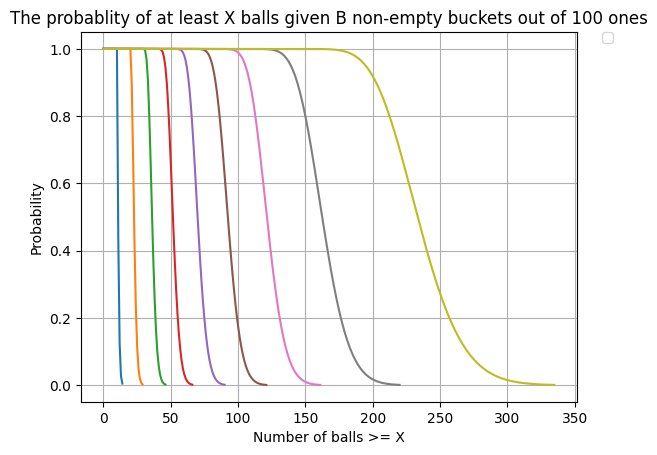

In [14]:
import matplotlib.pyplot as plt
# clear any plots
plt.clf()
plt.xlabel("Number of balls >= X")
plt.ylabel("Probability")
plt.title("The probablity of at least X balls given B non-empty buckets out of 100 ones")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)

def plot_one(b):
    end_idx = max(10, np.where(probs[b, :] < 0.001)[0][0])
    plt.plot(probs[b, :end_idx], label=f"{b} non-empty buckets")

for b in range(10, 100, 10):
    plot_one(b)

plt.show()